In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, f_oneway

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']  # This is the default LaTeX font
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})

# Reading the data
df = pd.read_csv('current_analysis/xdbc_experiments_master.csv')
df.drop(columns=['client_readmode', 'table', 'host', 'date', 'run'], inplace=True)
df = df[df['time']>3]


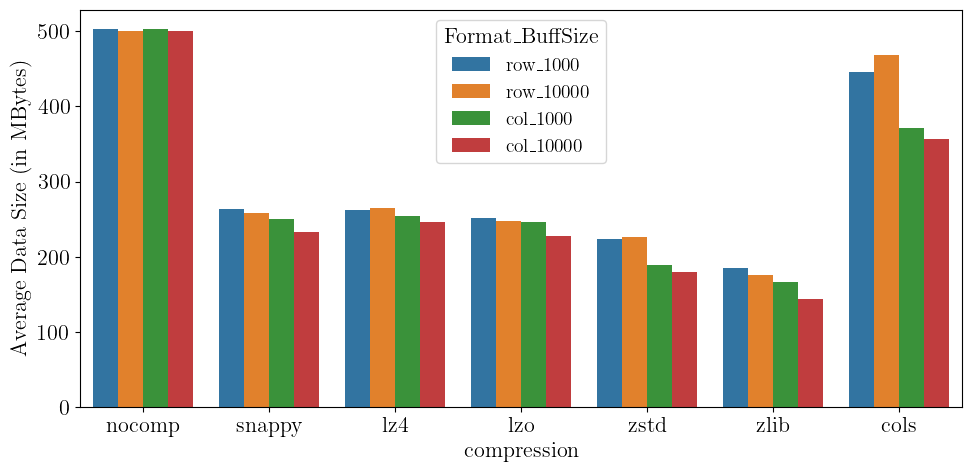

In [2]:
# Filter for desired parameters
filtered_df = df[df['format'].isin([1, 2])]

# Convert datasize to MBytes
filtered_df['datasize_MBytes'] = filtered_df['datasize'] * 1e-6

# Create a new column combining format and buff_size for hue differentiation
filtered_df['format_buff'] = filtered_df['format'].replace({1: 'row', 2: 'col'}) + "_" + filtered_df['buff_size'].map(str)

# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_df, x='compression', y='datasize_MBytes', hue='format_buff', estimator=np.mean, errorbar=None)

# Adjust the y-label and the legend
plt.ylabel('Average Data Size (in MBytes)')
plt.legend(title='Format_BuffSize', loc='best')

# Show the plot
plt.tight_layout()
plt.savefig(f'paper_plots/compression_datasize.pdf', bbox_inches='tight')
plt.show()

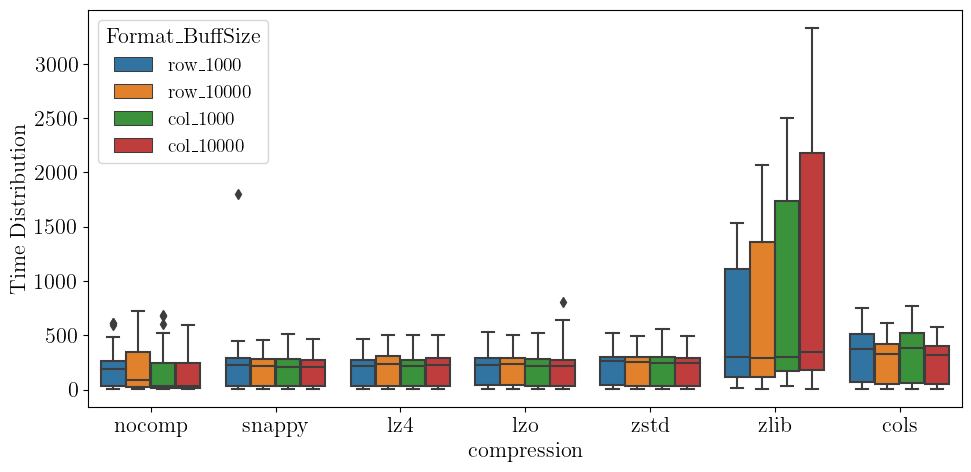

In [3]:
# Filter for desired parameters
filtered_df = df[df['format'].isin([1, 2])].copy()

# Create a new column combining format and buff_size for hue differentiation
filtered_df['format_buff'] = filtered_df['format'].replace({1: 'row', 2: 'col'}) + "_" + filtered_df['buff_size'].map(str)

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='compression', y='time', hue='format_buff')

# Adjust the y-label and the legend
plt.ylabel('Time Distribution')
plt.legend(title='Format_BuffSize', loc='best')

# Show the plot
plt.tight_layout()
plt.savefig(f'paper_plots/compression_time.pdf', bbox_inches='tight')
plt.show()

In [4]:
comp_df = df.copy()
comp_df = comp_df[
    (comp_df["client_cpu"].isin([7])) &
    (comp_df["network"].isin([100])) &
    (comp_df["system"] == "csv") &
    (comp_df["bufpool_size"] == 1000) &
    (comp_df["format"] == 1) &
    (comp_df["client_read_par"].isin([4])) &
    (comp_df["client_decomp_par"].isin([4]))
]
comp_df['environment'] = 'C' + comp_df['client_cpu'].astype(str) + ' S' + comp_df['server_cpu'].astype(str) + ' N' + comp_df['network'].astype(str)

server_parameters = ["compression","server_read_par", "server_read_partitions", "server_deser_par", "network_parallelism", "buff_size"]
best_parameters_for_environment = {}

for env in comp_df['environment'].unique():
    env_df = comp_df[comp_df['environment'] == env]
    # Sort by time and take the first row as the best configuration
    best_config = env_df.sort_values(by='time').iloc[0]
    best_params = {param: best_config[param] for param in server_parameters}
    best_parameters_for_environment[env] = best_params

display(best_parameters_for_environment)

{'C7.0 S1.0 N100': {'compression': 'nocomp',
  'server_read_par': 1,
  'server_read_partitions': 1,
  'server_deser_par': 1,
  'network_parallelism': 1,
  'buff_size': 1000},
 'C7.0 S0.2 N100': {'compression': 'nocomp',
  'server_read_par': 4,
  'server_read_partitions': 4,
  'server_deser_par': 1,
  'network_parallelism': 4,
  'buff_size': 1000},
 'C7.0 S7.0 N100': {'compression': 'snappy',
  'server_read_par': 4,
  'server_read_partitions': 8,
  'server_deser_par': 2,
  'network_parallelism': 1,
  'buff_size': 1000}}

system                    1045
compression               1045
format                    1045
network_parallelism       1045
bufpool_size              1045
buff_size                 1045
network                   1045
client_cpu                1045
client_read_par           1045
client_decomp_par         1045
server_cpu                1045
server_read_par           1045
server_read_partitions    1045
server_deser_par          1045
time                      1045
datasize                  1045
environment               1045
dtype: int64


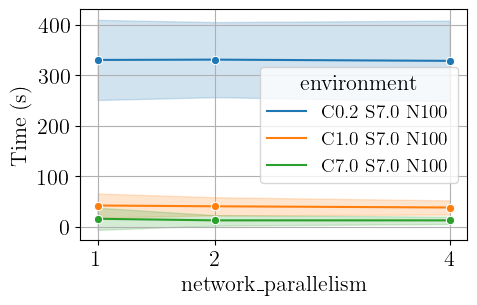

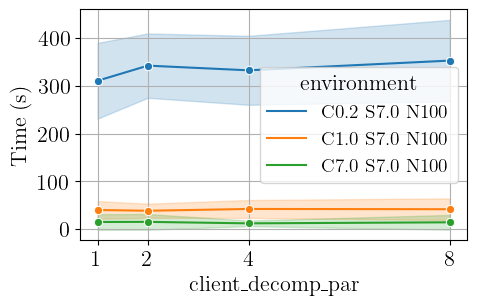

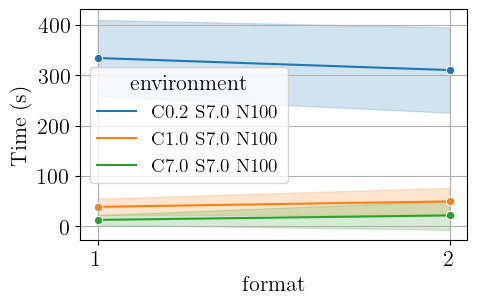

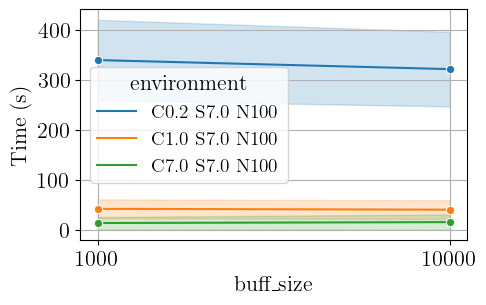

In [12]:
# Server parameters to plot
server_parameters = ["network_parallelism","client_decomp_par","format","buff_size"]

filtered_df = df.copy()
filtered_df = filtered_df[
    (filtered_df["server_cpu"].isin([7])) &
    (filtered_df["network"].isin([100])) &
    (filtered_df["system"] == "csv") &
    (filtered_df["bufpool_size"] == 1000) &
    (filtered_df["server_read_par"].isin([8])) &
    (filtered_df["server_read_partitions"].isin([8]))
]
filtered_df['environment'] = 'C' + filtered_df['client_cpu'].astype(str) + ' S' + filtered_df['server_cpu'].astype(str) + ' N' + filtered_df['network'].astype(str)
print(filtered_df.count())

for param in server_parameters:
    plt.figure(figsize=(5, 3))
    sns.lineplot(data=filtered_df, x=param, y="time", hue="environment", errorbar="sd", marker="o")
    #plt.title(f"Influence of {param} on performance")
    plt.ylabel("Time (s)")
    plt.xticks(filtered_df[param].unique())  # Set xticks to only have values present in the data
    plt.grid(True)
    #plt.savefig(f'paper_plots/average_{param}_for_weak_client.pdf', bbox_inches='tight')
    plt.show()